# <span style='font-family:Garamond'><span style='color:#B21807'> <h4 align="center">Analyse des ventes en ligne d'une librairie avec Python</h4> </span>

***

# <span style='font-family:Garamond'><span style='color:#B21807'>Table des matières : </span>
    

* [Introduction](#chapter0)
    * [0.1 Contexte](#section_0_1)
    * [0.2 import des librairies et tables necessaires](#section_0_2)
* [1 Nettoyage et première compréhension des tables](#chapter1)
    * [1.1 Table transactions](#section_1_1)
    * [1.2 Table Produits](#section_1_2)
    * [1.3 Table clients](#section_1_3)
* [2 Analyse du chiffre d'affaire et des ventes](#chapter2)
    * [2.1 Liaison des tables "produits" et "transactions"](#section_2_1)
    * [2.2 Analyse du chiffre d'affaire et des ventes global par ans, mois + moyenne mobile](#section_2_2)
* [3 Analyse des correlations](#chapter3)
    * [3.1  Genre d'un client et categorie de livre acheté](#section_3_1)    
    * [3.2  Age et montant total des achats ](#section_3_2)   
    * [3.3  Frequence d'achat et age d'un client ](#section_3_3)   
    * [3.4  Age et taille du panier moyens ](#section_3_4)   
    * [3.5  Age et categorie de livre acheté ](#section_3_5)   

***

# <span style='font-family:Garamond'><span style='color:#B21807'>Introduction</span> <a class="anchor" id="chapter0"></a>

## <span style='font-family:Garamond'><span style='color:#046307'>0.1 Contexte</span> <a class="anchor" id="section_0_1"></a>

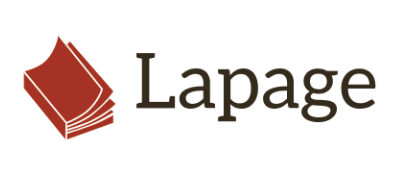

<div style='font-family:Garamond'><div style='font-size: 20px'>
    
**Consultant Data Analyst chez Lapage, une librairie en ligne.**

Proposant un site de vente en ligne depuis deux ans, l'entreprise souhaite faire un bilan de son activité sur Internet. Elle aimerait connaître : 

- Ses points forts et points faibles.
- Connaitre davantage sa clientèle et son comportement.

Pour ce travail, l'entreprise met à ma disposition 3 tables :
- Transactions : répertoriant  tous les produits achetés sur les deux années.
- Produits : répertoriant chaque produit vendu en ligne grâce à un I.D unique et fournissant également le prix de l'item ainsi que la catégorie à laquelle il appartient.
- La table Clients : répertoriant chaque client enregistré avec sa date de naissance et son genre.

Mes missions vont être :
- Nettoyer et traiter les tables afin d'obtenir un ensemble cohérent de données interprétable et utilisable pour obtenir les informations demandées.
- Analyser les ventes et le chiffre d'affaire sur ces deux années grâce à différents indicateurs.
- Réaliser une étude des références les plus et moins vendus sur le site.
- Essayer de trouver des corrélations entre différentes variables en opérant des analyses bivariées ainsi que des tests statistiques.</div>







## <span style='font-family:Garamond'><span style='color:#046307'>0.2 importation des librairies et tables necessaires</span> <a class="anchor" id="section_0_2"></a>



In [2]:
#Import des librairies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import scipy.stats as st
import scipy as sc
import pingouin as pg
from IPython.display import display_html

#Import des tables.
Transactions = pd.read_csv('transactions.csv')
Produits = pd.read_csv('products.csv')
Clients = pd.read_csv('customers.csv')

***

#  <span style='font-family:Garamond'><span style='color:#B21807'>1. Nettoyage et analyses des tables </span> <a class="anchor" id="chapter1"></a>

<div style='font-family:Garamond'><div style='font-size: 20px'>
    
Je vais ici opérer un nettoyage et un traitement des données classique, c'est-à-dire :
    
- Vérifier les valeurs manquantes.
- Vérifier que les variables faisant office de clé primaire n'aient pas de valeurs en double.
- Vérifier que chaque colonne soit au bon format.
- Vérifier qu'il n'y a pas de valeurs erronées.
- Récupérer les informations que j'estime essentiels sur chaque table
 </div>

## <span style='font-family:Garamond'><span style='color:#046307'>1.1 Table transactions </span> <a class="anchor" id="section_1_1"></a>     

In [3]:
# Récupération des informations de la table
display(Transactions.info())
display(Transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


None

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


<div style='font-family:Garamond'><div style='font-size: 20px'>

Grace à ces premières analyses, je constate :

- Qu'il n'y a aucune valeur manquante dans la table.
- La colonne date est au format objet et devra être mis au format date (datetime) afin d'opérer des manipulations d'ordre temporel.
- On observe que la valeur de la colonne date revenant le plus souvent est nommé "test". Nous allons devoir comprendre quelle sont ces lignes afin de voir si ce sont de veritable informations ou bien des lignes fictives de test.
- le fait que de l'alphabetique soit utilisé dans cette colonne va nous empêcher de faire passer cette colonne au format date.
- Il existe des valeurs en double dans la colonne date qui est censé être notre clé primaire. On va voir si elle ont un lien avec ces lignes tests.



La première chose à faire est d'analyser ces lignes "test" afin de savoir quoi en faire. 
</div>

In [4]:
display(Transactions[Transactions['date'].str.contains('test')],
        Transactions[Transactions['date'].str.contains('test')].describe())

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


<div style='font-family:Garamond'><div style='font-size: 20px'>

Ces 200 lignes ont toutes le même ID de session (T_0), de client (s_0) et de produit (ct_0 ou ct_1). De plus, la valeur date possède à chaque fois la denomination test. J'en conclu que ces lignes sont bien fictive. Je décide de les suprimmer.

Je vais pouvoir également faire passer ma colonne date au format datetime.
</div>

In [5]:
# Supression des lignes contenant le mot 'test' dans la colonne 'date' 
Transactions = Transactions[Transactions["date"].str.contains("test") == False]

# Faire passer colonne date au format 'datetime'
Transactions['date'] = pd.to_datetime(Transactions['date'])

# on réaffiche les informations sur la table pour vérifier.
display(Transactions.info())
display(Transactions.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


None

C:\Users\DATA\AppData\Local\Temp\ipykernel_5268\2919124965.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(Transactions.describe())


,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,679332,342315,8600
top,1_369,2022-05-20 13:21:29.043970,s_118668,c_1609
freq,2252,1,14,25488
first,NaN,2021-03-01 00:01:07.843138,NaN,NaN
last,NaN,2023-02-28 23:58:30.792755,NaN,NaN


In [6]:
# Analyse des valeurs min et max.
print(Transactions.min())
print()
print(Transactions.max())

id_prod                              0_0
date          2021-03-01 00:01:07.843138
session_id                           s_1
client_id                            c_1
dtype: object

id_prod                             2_99
date          2023-02-28 23:58:30.792755
session_id                       s_99998
client_id                          c_999
dtype: object


<div style='font-family:Garamond'><div style='font-size: 20px'>

Les lignes tests ont bien été supprimées, la colonne date est désormais au format datetime, la colonne date ne possède pas de doublon, elle pourra donc faire office de clé primaire de la table.

**Informations importantes de la table :**

- 679 332 transactions,
- 3 266 produits différents achetés,
- 8 600 clients uniques
- 342 315 sessions.
- La colonne date fait office de clé primaire.
- La table représente une analyse des transactions allant du 1ers mars 2021 au 28 février 2023 (2 années).
- Les dates vont jusqu'en 2023, on peut imaginer que c'est une erreur et qu'elle ont été avancés d'une année.
- Les I.D de produit sont référencé entre 0_0 et 2_99.
</div>


## <span style='font-family:Garamond'><span style='color:#046307'>1.2 table produits</span> <a class="anchor" id="section_1_2"></a>   

In [7]:
print(Produits.info())
print()
print(Produits.describe())
print()
print(Produits.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None

             price        categ
count  3287.000000  3287.000000
mean     21.856641     0.370246
std      29.847908     0.615387
min      -1.000000     0.000000
25%       6.990000     0.000000
50%      13.060000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000

id_prod    0
price      0
categ      0
dtype: int64


<div style='font-family:Garamond'><div style='font-size: 20px'>

Les valeurs de la variables price sont entre -1 et 300. Un prix de -1 n'etant pas possible on peut imaginer que c'est le produit lié aux lignes tests ( id T_0) nous allons zoomer dessus pour vérifier celà puis le suprimmer.
    
</div>

In [8]:
display(Produits.loc[Produits['price'] == -1.000000])

,id_prod,price,categ
731,T_0,-1.0,0


<div style='font-family:Garamond'><div style='font-size: 20px'>
L' i.d T_0 correspond bien aux transactions tests, on peut donc le suprimmer.
</div>

In [9]:
Produits = Produits[Produits['price'] != -1]

# Description de la table.
Produits.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


<div style='font-family:Garamond'><div style='font-size: 20px'>

On retient de cette table :

- La table produits compte 3 287 identifiant produit unique.
- C'est 21 id_produit en plus que sur la table transactions, ce qui veut dire que 21 produit n'ont jamais été achetés. Il faudra en tenir compte lors de la jointure pour ne pas perdre de données.
- L'id_produit constitue la clé primaire de notre table.
- Il existe 3 types de catégorie, 0, 1 et 2.
- Les prix sont compris entre 0.62 € et 300 €.
- les ID produits commençant par 0 appartiennent à la catégorie 0 et ainsi de suite. 
</div>

## <span style='font-family:Garamond'><span style='color:#046307'>1.3 Table Clients (Customers)</span>  <a class="anchor" id="section_1_3"></a>   


<div style='font-family:Garamond'><div style='font-size: 20px'>

On se souvient que les lignes test avait comme id_client 'ct', on va donc supprimer les lignes contenant les lettres ct dans la colonne id_client.
    </div>

In [10]:
# Supression des lignes
Clients = Clients[Clients["client_id"].str.contains("ct") == False]

#Verification
Clients[Clients['client_id'].str.contains('ct')]

,client_id,sex,birth


<div style='font-family:Garamond'><div style='font-size: 20px'>
Les lignes "test" ont bien été suprimmés.
    </div>

In [11]:
print("Description de la colonne client_id")
print (Clients['client_id'].describe())
print()
print("Description de la colonne sex")
print(Clients['sex'].describe())
print()
print("Description de la colonne birth")
print(Clients['birth'].describe())
print()
print("Afficher le nombre de valeurs nulles par colonne")
print(Clients.isnull().sum())
print()
print("Savoir si il y a des lignes en double")
print(Clients.duplicated().any())

Description de la colonne client_id
count       8621
unique      8621
top       c_4410
freq           1
Name: client_id, dtype: object

Description de la colonne sex
count     8621
unique       2
top          f
freq      4490
Name: sex, dtype: object

Description de la colonne birth
count    8621.000000
mean     1978.275606
std        16.917958
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64

Afficher le nombre de valeurs nulles par colonne
client_id    0
sex          0
birth        0
dtype: int64

Savoir si il y a des lignes en double
False


<div style='font-family:Garamond'><div style='font-size: 20px'>
    
**On retient pour cette table :**
    
- la variable id_client fait office de clé primaire
- 8623 id clients unique
- la colonne sex définit le genre de la personne ( f pour femme et m pour homme)
- les dates de naissance sont compris entre 1929 et 2004.
    </div>

***

# <span style='font-family:Garamond'><span style='color:#B21807'> 2 Analyse du chiffre d'affaire et des ventes</span> <a class="anchor" id="chapter2"></a>   





## <span style='font-family:Garamond'><span style='color:#046307'> 2.1 Jointure entre la table Produits et la table "Transactions".</span> <a class="anchor" id="section_2_1"></a> 


<div style='font-family:Garamond'><div style='font-size: 20px'>

Pour l'analyse du chiffre d'affaire, je vais devoir lier la table produits à la table transactions. Je vais utiliser une jointure 'outer' car commme nous l'avons vue, il y a 21 references qui n'ont jamais été vendu. La jointure outer permettra de conserver ces references et de les prendres en compte dans notre analyse des ventes.
</div>

In [12]:
# Jointure
TransactionetProduits = pd.merge( Produits, Transactions, on='id_prod', how ='outer')

# Resultat
display(TransactionetProduits)

# Zoom sur les lignes avec des valeurs manquantes
display(TransactionetProduits[TransactionetProduits['categ'].isnull()])

# Zoom sur les lignes avec des valeurs manquantes dans date
display(TransactionetProduits[TransactionetProduits['date'].isnull()])

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298
...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098


,id_prod,price,categ,date,session_id,client_id
679132,0_2245,NaN,NaN,2022-09-23 07:22:38.636773,s_272266,c_4746
679133,0_2245,NaN,NaN,2022-07-23 09:24:14.133889,s_242482,c_6713
679134,0_2245,NaN,NaN,2022-12-03 03:26:35.696673,s_306338,c_5108
679135,0_2245,NaN,NaN,2021-08-16 11:33:25.481411,s_76493,c_1391
679136,0_2245,NaN,NaN,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098


,id_prod,price,categ,date,session_id,client_id
39705,0_1016,35.06,0.0,NaT,NaN,NaN
62805,0_1780,1.67,0.0,NaT,NaN,NaN
162765,0_1062,20.08,0.0,NaT,NaN,NaN
177522,0_1119,2.99,0.0,NaT,NaN,NaN
181172,0_1014,1.15,0.0,NaT,NaN,NaN
188021,1_0,31.82,1.0,NaT,NaN,NaN
230468,0_1318,20.92,0.0,NaT,NaN,NaN
253465,0_1800,22.05,0.0,NaT,NaN,NaN
290409,0_1645,2.99,0.0,NaT,NaN,NaN
320861,0_322,2.99,0.0,NaT,NaN,NaN


<div style='font-family:Garamond'><div style='font-size: 20px'>

Une fois cette jointure faite, je remarque qu'il y a des lignes avec des valeurs manquantes notamment dans la colonne catégorie et prix. En zoomant sur ces lignes, on constate que ce sont toutes les lignes concernant l'id produit 0_2245.
L'information sur le prix et la catégorie étants essentiels, nous devons trouver un moyen de remplir ces valeurs manquantes.

Pour la colonne catégorie, le produit ayant un id commençant par 0, on en déduit que sa catégorie est 0, on peut donc remplir cette colonne.

Pour le prix du produit, on peut soit mettre la moyenne du prix de la catégorie 0 en regardant si les valeurs min et max de la catégorie ne sont pas trop éloignés. Ou bien voir si les prix sont par ordre croissant en fonction de leur ref, si c'est le cas, on pourra mettre le prix supérieur à la référence d'avant et inférieur à la ref d'après.
    
Ensuite, j'ai affiché les lignes avec les valeurs manquantes dans la colonne date, ce sont les 21 références qui n'ont jamais été vendues.
    
</div>

In [13]:
# On cherche la moyenne de la catégorie 0
print('Moyenne prix de la categorie 0 (mean) :')
print(TransactionetProduits.loc[TransactionetProduits['categ'] == 0, 'price'].describe())

Moyenne prix de la categorie 0 (mean) :
count    415475.000000
mean         10.638330
std           4.933982
min           0.620000
25%           6.290000
50%           9.990000
75%          14.450000
max          40.990000
Name: price, dtype: float64


In [14]:
# Rempalcement des NAN de categ par 0 
TransactionetProduits['categ'] = TransactionetProduits['categ'].fillna(0)

# remplacer les NaN des prix du produit par la moyenne ( 10.63)
TransactionetProduits['price'] = TransactionetProduits['price'].fillna(10.63)

# Vérification
print()
print('Vérification des valeurs pour le produit 0_2245')
display(TransactionetProduits.loc[TransactionetProduits['id_prod']== '0_2245', :])


Vérification des valeurs pour le produit 0_2245


,id_prod,price,categ,date,session_id,client_id
679132,0_2245,10.63,0.0,2022-09-23 07:22:38.636773,s_272266,c_4746
679133,0_2245,10.63,0.0,2022-07-23 09:24:14.133889,s_242482,c_6713
679134,0_2245,10.63,0.0,2022-12-03 03:26:35.696673,s_306338,c_5108
679135,0_2245,10.63,0.0,2021-08-16 11:33:25.481411,s_76493,c_1391
679136,0_2245,10.63,0.0,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...,...,...
679348,0_2245,10.63,0.0,2021-08-25 09:06:03.504061,s_80395,c_131
679349,0_2245,10.63,0.0,2022-03-06 19:59:19.462288,s_175311,c_4167
679350,0_2245,10.63,0.0,2022-05-16 11:35:20.319501,s_209381,c_4453
679351,0_2245,10.63,0.0,2022-02-11 09:05:43.952857,s_163405,c_1098


In [15]:
TransactionetProduits.isnull().sum()

id_prod        0
price          0
categ          0
date          21
session_id    21
client_id     21
dtype: int64

<div style="font-family:Garamond"> <div style="font-size: 20px">

Il ne reste plus que les valeurs manquantes pour les 21 références jamais vendues, on peut donc passer à l'analyse des ventes et du chiffre  d'affaire.  
</div>

## <span style='font-family:Garamond'><span style='color:#046307'> 2.2 Analyse du chiffre d'affaire et des ventes global par ans, mois + moyenne mobile. </span> <a class="anchor" id="section_2_2"></a>  

###  <div style="font-family:Garamond"> <div style="font-size: 20px">Chiffre d'affaire et vente global :</div>

In [16]:
CA_GLOBAL = TransactionetProduits['price'].sum()
VENTE_GLOBAL = TransactionetProduits['date'].count()
print('CA =', CA_GLOBAL)
print ('Vente =', VENTE_GLOBAL)

CA = 11856873.190000001
Vente = 679332


###  <div style="font-family:Garamond"> <div style="font-size: 20px">Chiffre d'affaire et vente par années :</div>

In [17]:
# Chiffre d'affaire année 1 (sur 12 mois à partir du 1 er mois d'analyse 01/03/21 au 31/02/2022). 
CA_ANNEE_1 = TransactionetProduits.loc[(TransactionetProduits['date'] >= '2021-03-01') & (TransactionetProduits['date'] < '2022-03-01'), 'price'].sum().round(2)
# Nombre de vente année 1 
VENTES_ANNEE_1 = TransactionetProduits.loc[(TransactionetProduits['date'] >= '2021-03-01') & (TransactionetProduits['date'] < '2022-03-01'), 'date'].count()

# Chiffre d'affaire année 2 (sur 12 mois à partir du 1 er mois d'analyse 01/03/22 au 28/02/2023 inclus).
CA_ANNEE_2 = TransactionetProduits.loc[(TransactionetProduits['date'] >= '2022-03-01') & (TransactionetProduits['date'] < '2023-03-01'), 'price'].sum().round(2)
# Nombre de vente année 2
VENTES_ANNEE_2 = TransactionetProduits.loc[(TransactionetProduits['date'] >= '2022-03-01') & (TransactionetProduits['date'] < '2023-03-01'), 'date'].count()

# Taux d'evolution CA entre année 1 et 2.
TX_EVOLUTION_CA_ANNEE1_ANNEE2 = (TransactionetProduits.loc[(TransactionetProduits['date'] >= '2022-03-01') & (TransactionetProduits['date'] < '2023-03-01'), 'price'].sum()
 - TransactionetProduits.loc[(TransactionetProduits['date'] >= '2021-03-01') & (TransactionetProduits['date'] < '2022-03-01'), 'price'].sum()
)/TransactionetProduits.loc[(TransactionetProduits['date'] >= '2022-03-01') & (TransactionetProduits['date'] < '2023-03-01'), 'price'].sum()
TX_EVOLUTION_CA_ANNEE1_ANNEE2 = TX_EVOLUTION_CA_ANNEE1_ANNEE2.round(2)
# Taux d'evolution ventes entre année 1 et 2.
TX_EVOLUTION_VENTES_ANNEE1_ANNEE2 = (TransactionetProduits.loc[(TransactionetProduits['date'] >= '2022-03-01') & (TransactionetProduits['date'] < '2023-03-01'), 'date'].count()
 - TransactionetProduits.loc[(TransactionetProduits['date'] >= '2021-03-01') & (TransactionetProduits['date'] < '2022-03-01'), 'date'].count()
)/TransactionetProduits.loc[(TransactionetProduits['date'] >= '2021-03-01') & (TransactionetProduits['date'] < '2022-03-01'), 'date'].count()
TX_EVOLUTION_VENTES_ANNEE1_ANNEE2 = TX_EVOLUTION_VENTES_ANNEE1_ANNEE2.round(2)
print('Année 1 ( 01/03/21 au 28/02/2022)')
print()
print('- C.A =', CA_ANNEE_1, '€')
print('- Nombre de vente =', VENTES_ANNEE_1)
print()
print('Année 2 ( 01/03/22 au 28/02/2023)')
print()
print('- C.A =', CA_ANNEE_2, '€')
print('- Nombre de vente =', VENTES_ANNEE_2)
print()
print('Evolution :')
print('- +',TX_EVOLUTION_CA_ANNEE1_ANNEE2, '% de C.A')
print('- +', TX_EVOLUTION_VENTES_ANNEE1_ANNEE2, '% de vente')

Année 1 ( 01/03/21 au 28/02/2022)

- C.A = 5832831.94 €
- Nombre de vente = 337288

Année 2 ( 01/03/22 au 28/02/2023)

- C.A = 6023245.97 €
- Nombre de vente = 342044

Evolution :
- + 0.03 % de C.A
- + 0.01 % de vente


<div style="font-family:Garamond"> <div style="font-size: 20px">
    
**Sur les deux années :**
    
- Chiffre d'affaire : 11 856 873.19 €
- Nombre de ventes : 679 332.
    
**Evolution par années :**
    
- **Année 1** : C.A = 5 832 831.94 €, Nombre de vente = 337 288.
- **Année 2** : C.A = 6 023 245.97 €, Nombre de vente = 342 044.
    
**Evolution :**
- +0.03 % de C.A
- +0.01 % de vente

    
</div>

 ###  <div style="font-family:Garamond"> <div style="font-size: 20px"> Chiffre d'affaire et volume de vente par mois </div>

<div style="font-family:Garamond"> <div style="font-size: 20px">
   
Pour effectuer ces calculs, je vais rajouter 2 colonnes à notre DF donnant le mois et l'année de la transactions puis créer deux nouvelles tables presentant le C.A par mois et les ventes par mois.
    
</div>

Chiffre d'affaire par mois


année   mois
2021.0  3.0     482536.28
        4.0     476258.12
        5.0     493028.51
        6.0     484162.97
        7.0     482877.92
        8.0     482380.46
        9.0     507368.24
        10.0    320873.15
        11.0    516274.03
        12.0    525991.69
2022.0  1.0     525392.14
        2.0     535688.43
        3.0     515573.46
        4.0     493147.76
        5.0     517302.68
        6.0     496090.53
        7.0     510910.68
        8.0     506552.31
        9.0     494210.20
        10.0    508024.07
        11.0    496781.87
        12.0    510283.28
2023.0  1.0     517614.96
        2.0     456754.17
Name: price, dtype: float64

Ventes par mois


année   mois
2021.0  3.0     28610
        4.0     28457
        5.0     28293
        6.0     26857
        7.0     24742
        8.0     25659
        9.0     33326
        10.0    21606
        11.0    28321
        12.0    32464
2022.0  1.0     29348
        2.0     29605
        3.0     29707
        4.0     27616
        5.0     29991
        6.0     28511
        7.0     28682
        8.0     28552
        9.0     28315
        10.0    28974
        11.0    28574
        12.0    28625
2023.0  1.0     28945
        2.0     25552
Name: date, dtype: int64

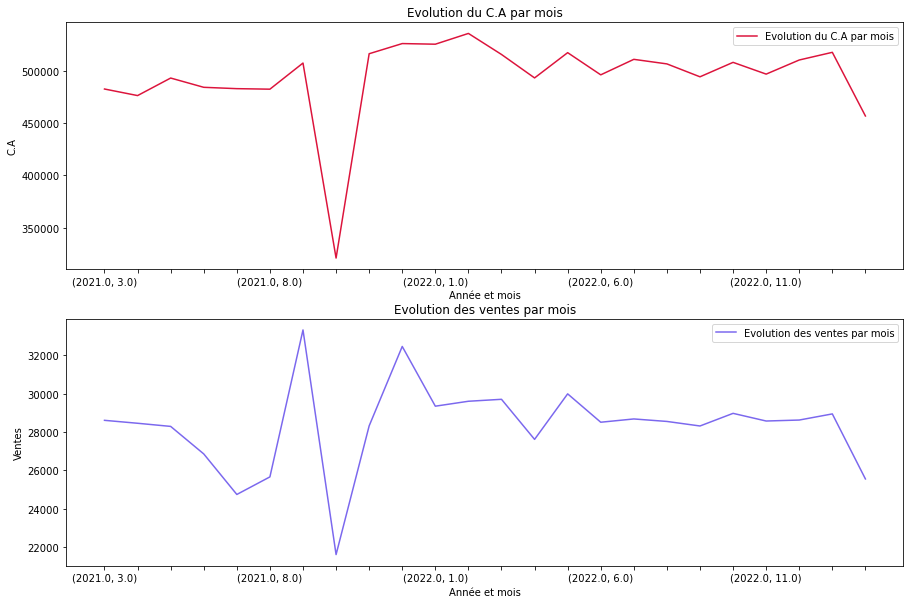

<Figure size 432x288 with 0 Axes>

In [18]:
# Rajout des colonnes année et mois.
TransactionetProduits["année"] = TransactionetProduits["date"].dt.year
TransactionetProduits["mois"] = TransactionetProduits["date"].dt.month
# Création des DF avec CA et ventes trié par mois de chaque années
CAparmois = TransactionetProduits.groupby(["année","mois"])["price"].sum()
CAparmois = CAparmois
Venteparmois = TransactionetProduits.groupby(["année","mois"])["date"].count()
Venteparmois = Venteparmois

print("Chiffre d'affaire par mois")
display(CAparmois)
print("Ventes par mois")
display(Venteparmois)

# Graph
plt.figure(figsize =(15,10))
plt.subplot(2,1,1)
CAparmois.plot(c='crimson', lw= '1.5', label='Evolution du C.A par mois')
plt.title('Evolution du C.A par mois')
plt.xlabel('Année et mois')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel('C.A')
plt.legend()
plt.subplot(2,1,2)
Venteparmois.plot(c='mediumslateblue', lw= '1.5', label='Evolution des ventes par mois')
plt.title('Evolution des ventes par mois')
plt.xlabel('Année et mois')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.ylabel('Ventes')
plt.legend()
plt.show()
plt.savefig('Evolutioncaetventeparmois')

<div style="font-family:Garamond"> <div style="font-size: 20px">

Premièrement, on remarque une baisse importante et brusque du CA. et des ventes pour le mois d'octobre 2021. Nous allons dans un premier temps faire notre analyse des ventes et du CA. par mois par catégories puis nous zoomerons sur le mois d'octobre 2021 afin de comprendre ce qui s'y passe.

On peut voir que sauf pour le mois d'octobre 2021 l'évolution du CA. reste plutôt stables. Le montant des ventes peut varier de manière plus importante, mais ne semble pas influencer le résultat en termes de chiffre d'affaires.   
    </div>

###  <div style="font-family:Garamond"> <div style="font-size: 20px"> Chiffre d'affaire et volume de vente par mois par catégorie. </div>

Text(0.5, 1.0, "chiffre d'affaires par catégories par mois")

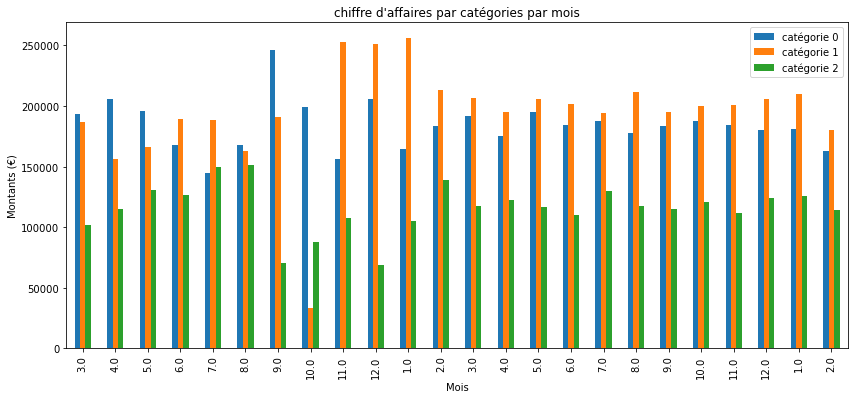

In [19]:
# Creation DF specifique C.A par categories
CA_PAR_MOIS_PAR_CATEGORIES = TransactionetProduits[["categ", "price", "année", "mois"]]
CA_PAR_MOIS_PAR_CATEGORIES = pd.pivot_table(CA_PAR_MOIS_PAR_CATEGORIES, index=["année","mois"], columns=["categ"], aggfunc=["sum"]).reset_index()
CA_PAR_MOIS_PAR_CATEGORIES.columns = ["année", "mois", "catégorie 0", "catégorie 1", "catégorie 2"]
CA_PAR_MOIS_PAR_CATEGORIES.set_index("mois", inplace = True)

# Creation DF specifique Ventes par categories
VENTES_PAR_MOIS_PAR_CATEGORIES = TransactionetProduits[["categ", "price", "année", "mois"]]
VENTES_PAR_MOIS_PAR_CATEGORIES = pd.pivot_table(VENTES_PAR_MOIS_PAR_CATEGORIES, index=["année","mois"], columns=["categ"], aggfunc=["count"]).reset_index()
VENTES_PAR_MOIS_PAR_CATEGORIES.columns = ["année", "mois", "catégorie 0", "catégorie 1", "catégorie 2"]
VENTES_PAR_MOIS_PAR_CATEGORIES.set_index("mois", inplace = True)

# Graphique 
CA_PAR_MOIS_PAR_CATEGORIES[["catégorie 0", "catégorie 1", "catégorie 2"]].plot.bar(figsize=(14,6))
plt.legend(["catégorie 0", "catégorie 1", "catégorie 2"])
plt.xlabel("Mois")
plt.ylabel("Montants (€)")
plt.title("chiffre d'affaires par catégories par mois")

 <div style="font-family:Garamond"> <div style="font-size: 20px">
Grâce à ce graphique, on constate que c'est la catégorie 1 qui semble être celle qui contribue le plus au chiffre d'affaires suivies de très près par la catégorie 0.

<br>**La catégorie 2** est bien en dessous chaque mois sauf au mois d'août 2021 ou les 3 catégories étaient presque au même point. Du mars 2021 à août 2021 inclus, la catégorie 2 ne fait quasiment qu'augmenter pour rechuter brutalement au mois de septembre. Elle génère un plus faible chiffre d'affaire de septembre à février 2022 non inclus où elle se stabilise autour des 100 000 € de C.A.

<br>**La catégorie 1** a fait 3 gros mois de novembre 2021 à janvier 2022 inclus. Sûrement grâce aux fêtes de Noël. Cependant, on ne retrouve plus cette augmentation l'année d'après. On pourrait se demander pourquoi cette hausse n'a pas eu lieu ? Y avait-il les mêmes références en ventes que l'année précédente ? Suffisamment de stock ? La communication sur ces produits, a-t-elle été suffisante ? Différente ?

**La catégorie 0** fait un très bon mois de septembre 2021 et dépasse la catégorie 1. Peut-être que cette catégorie comprend les manuels scolaires ? En-tout-cas comme pour la catégorie 1, on ne retrouve plus ce pique l'année suivante. Il serait bien de savoir pourquoi il n'y est pas.

À partir de février 2021, l'évolution du C.A. par mois reste stable pour chaque catégorie, et cela, jusqu'à la fin de l'analyse, c'est-à-dire fin février 20223.

On apprend également grâce à ce graphique qu'il y a bien une chute du C.A. pour le mois d'octobre 2021, mais seulement sur la catégorie 1. On va maintenant pouvoir enquêter là-dessus en affichant seulement les résultats d'octobre 2021.
    </div>

### <div style="font-family:Garamond"> <div style="font-size: 20px">Etude d'octobre 2021.</div>

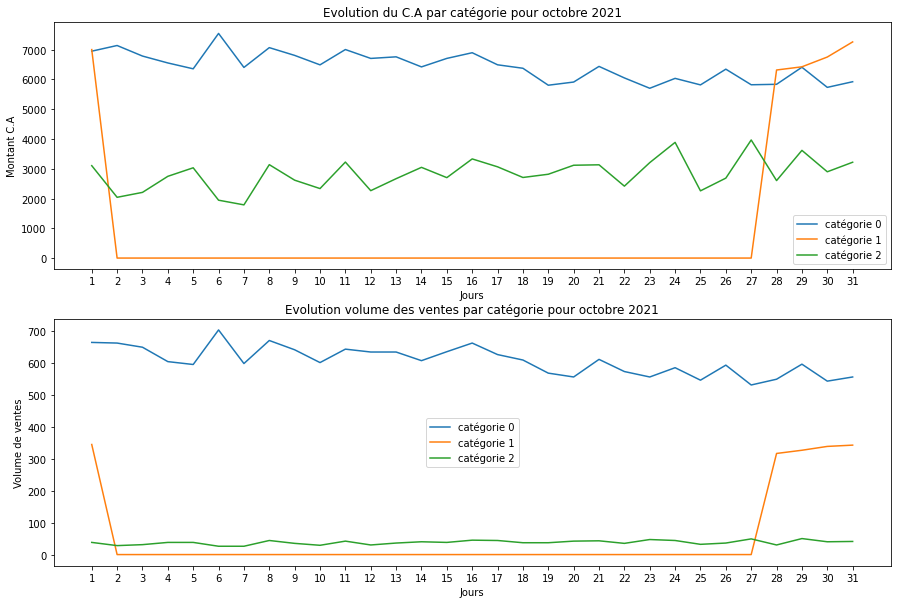

In [20]:
# on rajoute une colonne avec les informations sur le jour
TransactionetProduits['jour'] = TransactionetProduits['date'].dt.day

#Création du DF C.A pour octobre.
CA_JOURNALIER_OCTOBRE2021_CATEGORIE = TransactionetProduits
CA_JOURNALIER_OCTOBRE2021_CATEGORIE = CA_JOURNALIER_OCTOBRE2021_CATEGORIE.loc[(CA_JOURNALIER_OCTOBRE2021_CATEGORIE["année"] == 2021) & (CA_JOURNALIER_OCTOBRE2021_CATEGORIE["mois"] == 10),:]
CA_JOURNALIER_OCTOBRE2021_CATEGORIE = CA_JOURNALIER_OCTOBRE2021_CATEGORIE[["categ", "price","jour"]]
CA_JOURNALIER_OCTOBRE2021_CATEGORIE = pd.pivot_table(CA_JOURNALIER_OCTOBRE2021_CATEGORIE, index=["jour"], columns=["categ"], aggfunc=["sum"])
CA_JOURNALIER_OCTOBRE2021_CATEGORIE.columns = ["catégorie 0", "catégorie 1", "catégorie 2"]
# remplacer les NaN par des 0
CA_JOURNALIER_OCTOBRE2021_CATEGORIE['catégorie 1'] = CA_JOURNALIER_OCTOBRE2021_CATEGORIE['catégorie 1'].fillna(0)
    
#Création du DF ventes pour octobre.
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE = TransactionetProduits
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE = VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE.loc[(VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE["année"] == 2021) & (VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE["mois"] == 10),:]
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE = VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE[["categ", "price","jour"]]
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE = pd.pivot_table(VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE, index=["jour"], columns=["categ"], aggfunc=["count"])
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE.columns = ["catégorie 0", "catégorie 1", "catégorie 2"]
# remplacer les NaN par des 0
VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE['catégorie 1'] = VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE['catégorie 1'].fillna(0)


# Création des graph
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(CA_JOURNALIER_OCTOBRE2021_CATEGORIE.index,CA_JOURNALIER_OCTOBRE2021_CATEGORIE['catégorie 0'],label ='catégorie 0')
plt.plot(CA_JOURNALIER_OCTOBRE2021_CATEGORIE.index,CA_JOURNALIER_OCTOBRE2021_CATEGORIE['catégorie 1'],label ='catégorie 1')
plt.plot(CA_JOURNALIER_OCTOBRE2021_CATEGORIE.index,CA_JOURNALIER_OCTOBRE2021_CATEGORIE['catégorie 2'],label ='catégorie 2')
plt.title('Evolution du C.A par catégorie pour octobre 2021')
plt.xlabel('Jours')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

plt.ylabel('Montant C.A')
plt.legend()
plt.subplot(2,1,2)
plt.plot(VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE.index,VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE['catégorie 0'],label ='catégorie 0')
plt.plot(VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE.index,VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE['catégorie 1'],label ='catégorie 1')
plt.plot(VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE.index,VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE['catégorie 2'],label ='catégorie 2')
plt.title('Evolution volume des ventes par catégorie pour octobre 2021')
plt.xlabel('Jours')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.ylabel('Volume de ventes')
plt.legend()

In [21]:
# Affichage de tables affichant les ventes et le C.A par jours de la catégorie 1

# Creation d'une fonction affin d'afficher les tables les une à côté des autres
def display_dfs(dfs, gap=50, justify='center'):
    html = ""
    for title, df in dfs.items():  
        df_html = df._repr_html_()
        cur_html = f'<div> <h3>{title}</h3> {df_html}</div>'
        html +=  cur_html
    html= f"""
    <div style="display:flex; gap:{gap}px; justify-content:{justify};">
        {html}
    </div>
    """
    display_html(html, raw=True)
    
# Affichage des tables
dfs0 = {'Ventes par jour': VENTE_JOURNALIERE_OCTOBRE2021_CATEGORIE, 'C.A par jour':CA_JOURNALIER_OCTOBRE2021_CATEGORIE}
display_dfs(dfs0, justify='flex-start')


,catégorie 0,catégorie 1,catégorie 2
jour,,,
1.0,663.0,344.0,38.0
2.0,661.0,0.0,28.0
3.0,648.0,0.0,31.0
4.0,603.0,0.0,38.0
5.0,594.0,0.0,38.0
6.0,702.0,0.0,26.0
7.0,597.0,0.0,26.0
8.0,669.0,0.0,44.0
9.0,640.0,0.0,35.0


 <div style="font-family:Garamond"> <div style="font-size: 20px">
On peut constater grâce à ces graphiques ainsi que les tables générés, qu'il y a bien une absence de résultat du 2 octobre 2021 inclus jusqu'au 27 octobre 2021 inclus sur la catégorie 1 seulement (les autres étant stables).

 <br>On peut émettre plusieurs hypothèses sur ces résultats de la catégorie 1 :
    
- Y a-t-il eu un problème informatique empêchant les clients de pouvoir acheter les livres étant référencé dans la catégorie 1 ? Un employé aurait pu mettre tous les livres de la catégorie 1 indisponible à l'achat.
- La partie du site proposant les livres de catégorie 1 était elle hors ligne durant cette période, empêchant les clients de trouver ces livres ? Y a-t-il eu une restructuration du site ?
- Y a-t-il eu un problème de stock ? Les fournisseurs de livres de catégorie 1 ont ils pu fournir la librairie ?
- Est-ce que les ventes n'ont simplement pas été enregistrées dans les analyses à cause d'un bug ?

    </div>

### <div style="font-family:Garamond"> <div style="font-size: 20px">Repartition du CA et vente global par catégorie </div>

,Catégorie,C.A
0,0,4422309.26
1,1,4653794.24
2,2,2780769.69


<AxesSubplot:title={'center':'Repartition des ventes par catégorie'}, ylabel='VENTES'>

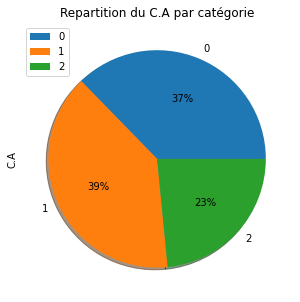

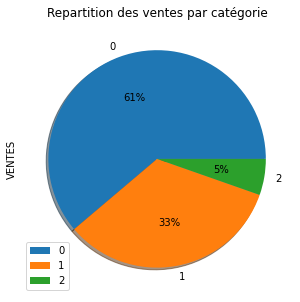

In [22]:
#Creation DF CA global par categories
VISUALISATION_PAR_CATEGORIE_CA_GLOBAL = pd.DataFrame(
{
    'Catégorie' : [0,1,2],
    'C.A' : [TransactionetProduits.loc[TransactionetProduits['categ'] == 0, 'price'].sum()
,TransactionetProduits.loc[TransactionetProduits['categ'] == 1, 'price'].sum()
,TransactionetProduits.loc[TransactionetProduits['categ'] == 2, 'price'].sum()
],    
}
)
#Creation DF ventes global par categories
VISUALISATION_PAR_CATEGORIE_VENTES_GLOBAL = pd.DataFrame(
{
    'Catégorie' : [0,1,2],
    'VENTES' : [TransactionetProduits.loc[TransactionetProduits['categ'] == 0, 'price'].count()
,TransactionetProduits.loc[TransactionetProduits['categ'] == 1, 'price'].count()
,TransactionetProduits.loc[TransactionetProduits['categ'] == 2, 'price'].count()
],    
}
)
display(VISUALISATION_PAR_CATEGORIE_CA_GLOBAL)

# Création des graph
VISUALISATION_PAR_CATEGORIE_CA_GLOBAL.plot(kind='pie',y= 'C.A',autopct='%1.0f%%', shadow =True, figsize=(5,5), title='Repartition du C.A par catégorie')

VISUALISATION_PAR_CATEGORIE_VENTES_GLOBAL.plot(kind='pie',y= 'VENTES',autopct='%1.0f%%', shadow =True, figsize=(5,5), title='Repartition des ventes par catégorie')


 <div style="font-family:Garamond"> <div style="font-size: 20px">
La catégorie 1 est celle qui participe le plus au chiffre d'affaire (39%) suivie de très prêt par la categorie 0 (37%). La catégorie 2 participe à 23 % de chiffre d'affaires global.

En observant la proportion des ventes par catégories, on voit que la catégorie 0 engendre 61 % des ventes à elle seule. Cette catégorie regroupe les références aux prix les plus bas à l'inverse de la catégorie deux qui ne participe qu'à 5 % des ventes, mais comme on l'a dit à 23 % du C.A. Cette dernière regroupe donc les livres les plus chère.
    </div>

### <div style="font-family:Garamond"> <div style="font-size: 20px">Moyenne mobile du CA par mois et des ventes</div>

 <div style="font-family:Garamond"> <div style="font-size: 20px">
Nous allons maintenant visualiser une moyenne mobile de l'évolution du C.A et des ventes par mois afin d'observer une tendance plus général.
    </div>

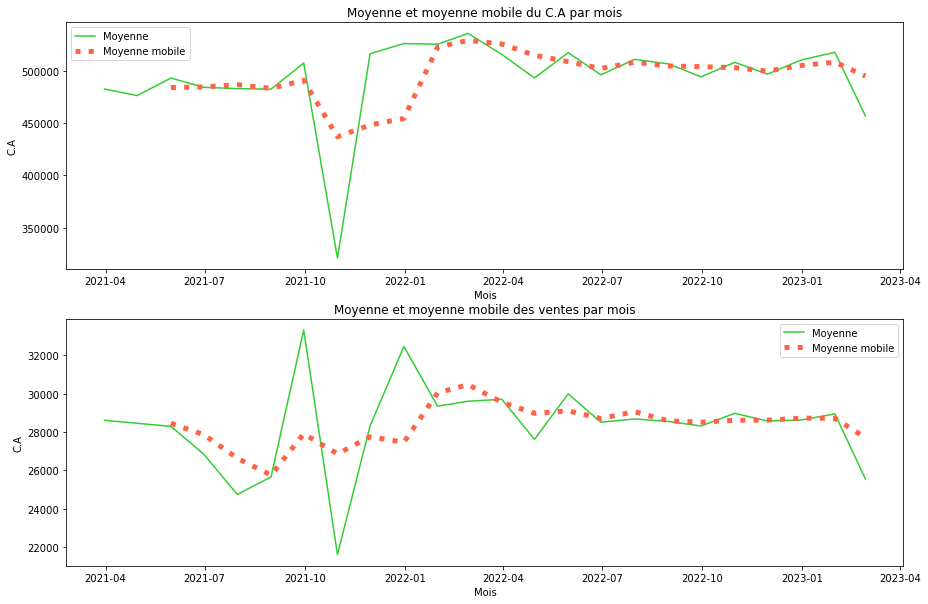

In [23]:
# Création d'une table avec le ca par mois.
CA_PAR_MOIS_RESAMPLE = TransactionetProduits
CA_PAR_MOIS_RESAMPLE.set_index("date", inplace = True)
CA_PAR_MOIS_RESAMPLE = CA_PAR_MOIS_RESAMPLE.drop(['id_prod', 'categ', 'session_id', 'client_id', 'année', 'mois', 'jour'], axis=1)
CA_PAR_MOIS_RESAMPLE = CA_PAR_MOIS_RESAMPLE.resample('M').sum()
CA_PAR_MOIS_RESAMPLE = CA_PAR_MOIS_RESAMPLE.rename(columns={'price': 'C.A'})
# Calcul de la moyenne mobile pour le CA par mois
MOYENNE_MOBILE_CA_PAR_MOIS_RESAMPLE = CA_PAR_MOIS_RESAMPLE.rolling(window=3).mean()

# Création d'une table avec les ventes par mois.
VENTE_PAR_MOIS_RESAMPLE = TransactionetProduits
VENTE_PAR_MOIS_RESAMPLE = VENTE_PAR_MOIS_RESAMPLE.drop(['id_prod', 'categ', 'session_id', 'client_id', 'année', 'mois', 'jour'], axis=1)
VENTE_PAR_MOIS_RESAMPLE = VENTE_PAR_MOIS_RESAMPLE.resample('M').count()
VENTE_PAR_MOIS_RESAMPLE = VENTE_PAR_MOIS_RESAMPLE.rename(columns={'price': 'Ventes'})
# Calcul de la moyenne mobile pour les ventes par mois
MOYENNE_MOBILE_VENTE_PAR_MOIS_RESAMPLE = VENTE_PAR_MOIS_RESAMPLE.rolling(window=3).mean()

# Création des graphiques
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(CA_PAR_MOIS_RESAMPLE.index, CA_PAR_MOIS_RESAMPLE['C.A'],c='limegreen',label ='Moyenne')
plt.plot(MOYENNE_MOBILE_CA_PAR_MOIS_RESAMPLE.index,MOYENNE_MOBILE_CA_PAR_MOIS_RESAMPLE['C.A'], c='tomato', ls=':', label ='Moyenne mobile', lw=5)
plt.title('Moyenne et moyenne mobile du C.A par mois')
plt.xlabel('Mois')
plt.ylabel('C.A')
plt.legend()
plt.subplot(2,1,2)
plt.plot(VENTE_PAR_MOIS_RESAMPLE.index, VENTE_PAR_MOIS_RESAMPLE['Ventes'],c='limegreen',label ='Moyenne')
plt.plot(MOYENNE_MOBILE_VENTE_PAR_MOIS_RESAMPLE.index,MOYENNE_MOBILE_VENTE_PAR_MOIS_RESAMPLE['Ventes'], c='tomato', ls=':', label ='Moyenne mobile', lw=5)
plt.title('Moyenne et moyenne mobile des ventes par mois')
plt.xlabel('Mois')
plt.ylabel('C.A')
plt.legend()
plt.show()

 <div style="font-family:Garamond"> <div style="font-size: 20px">
On observe grâce à ces graphiques que le C.A. par mois oscille autour des 475 000 €/500 000 € par mois et que la librairie effectue environ 28 000 ventes par mois.
    </div>

### <div style="font-family:Garamond"> <div style="font-size: 20px">Etude des references</div>

In [24]:
TOP_GLOBAL = TransactionetProduits
TOP_GLOBAL = TOP_GLOBAL.reset_index()
TOP_GLOBAL = TOP_GLOBAL.groupby('id_prod')['date'].count()
TOP_GLOBAL = TOP_GLOBAL.sort_values( ascending= False)
TOP_GLOBAL = TOP_GLOBAL.head(30).to_frame()
TOP_GLOBAL = TOP_GLOBAL.rename(columns={"date": 'Nombre de ventes'})


FLOP_GLOBAL = TransactionetProduits
FLOP_GLOBAL = FLOP_GLOBAL.reset_index()
FLOP_GLOBAL = FLOP_GLOBAL.groupby('id_prod')['date'].count()
FLOP_GLOBAL = FLOP_GLOBAL.sort_values(ascending=True)
FLOP_GLOBAL = FLOP_GLOBAL.head(30).to_frame()
FLOP_GLOBAL = FLOP_GLOBAL.rename(columns={"date": 'Nombre de ventes'})

TOP_PAR_CATEG = TransactionetProduits
TOP_PAR_CATEG = TOP_PAR_CATEG.reset_index()
TOP_PAR_CATEG = TOP_PAR_CATEG.groupby('categ')['date'].count()
TOP_PAR_CATEG = TOP_PAR_CATEG.to_frame()
TOP_PAR_CATEG = TOP_PAR_CATEG.rename(columns={"date": 'Nombre de ventes'})


TOP_CATEG_0 = TransactionetProduits.loc[TransactionetProduits['categ'] == 0, :]
TOP_CATEG_0 = TOP_CATEG_0.reset_index()
TOP_CATEG_0 = TOP_CATEG_0.groupby('id_prod')['date'].count()
TOP_CATEG_0 = TOP_CATEG_0.sort_values( ascending= False)
TOP_CATEG_0 = TOP_CATEG_0.head(30).to_frame()
TOP_CATEG_0 = TOP_CATEG_0.rename(columns={"date": 'Nombre de ventes'})


FLOP_CATEG_0 = TransactionetProduits.loc[TransactionetProduits['categ'] == 0, :]
FLOP_CATEG_0 = FLOP_CATEG_0.reset_index()
FLOP_CATEG_0 = FLOP_CATEG_0.groupby('id_prod')['date'].count()
FLOP_CATEG_0 = FLOP_CATEG_0.sort_values( ascending= True)
FLOP_CATEG_0 = FLOP_CATEG_0.head(30).to_frame()
FLOP_CATEG_0 = FLOP_CATEG_0.rename(columns={"date": 'Nombre de ventes'})


TOP_CATEG_1 = TransactionetProduits.loc[TransactionetProduits['categ'] == 1, :]
TOP_CATEG_1 = TOP_CATEG_1.reset_index()
TOP_CATEG_1 = TOP_CATEG_1.groupby('id_prod')['date'].count()
TOP_CATEG_1 = TOP_CATEG_1.sort_values( ascending= False)
TOP_CATEG_1 = TOP_CATEG_1.head(30).to_frame()
TOP_CATEG_1 = TOP_CATEG_1.rename(columns={"date": 'Nombre de ventes'})


FLOP_CATEG_1 = TransactionetProduits.loc[TransactionetProduits['categ'] == 1, :]
FLOP_CATEG_1 = FLOP_CATEG_1.reset_index()
FLOP_CATEG_1 = FLOP_CATEG_1.groupby('id_prod')['date'].count()
FLOP_CATEG_1 = FLOP_CATEG_1.sort_values( ascending= True)
FLOP_CATEG_1 = FLOP_CATEG_1.head(30).to_frame()
FLOP_CATEG_1 = FLOP_CATEG_1.rename(columns={"date": 'Nombre de ventes'})


TOP_CATEG_2 = TransactionetProduits.loc[TransactionetProduits['categ'] == 2, :]
TOP_CATEG_2 = TOP_CATEG_2.reset_index()
TOP_CATEG_2 = TOP_CATEG_2.groupby('id_prod')['date'].count()
TOP_CATEG_2 = TOP_CATEG_2.sort_values( ascending= False)
TOP_CATEG_2 = TOP_CATEG_2.head(30).to_frame()
TOP_CATEG_2 = TOP_CATEG_2.rename(columns={"date": 'Nombre de ventes'})

FLOP_CATEG_2 = TransactionetProduits.loc[TransactionetProduits['categ'] == 2, :]
FLOP_CATEG_2 = FLOP_CATEG_2.reset_index()
FLOP_CATEG_2 = FLOP_CATEG_2.groupby('id_prod')['date'].count()
FLOP_CATEG_2 = FLOP_CATEG_2.sort_values( ascending= True)
FLOP_CATEG_2 = FLOP_CATEG_2.head(30).to_frame()
FLOP_CATEG_2 = FLOP_CATEG_2.rename(columns={"date": 'Nombre de ventes'})

# Création d'un dictionnaire des tables à afficher 
dfs1 = {'Top global': TOP_GLOBAL, 'Flop global': FLOP_GLOBAL, 'Ventes par catégories' : TOP_PAR_CATEG }
dfs2 = {'Top catégorie 0': TOP_CATEG_0, 'Top catégorie 1': TOP_CATEG_1, 'Top catégorie 2' : TOP_CATEG_2 }
dfs3 = {'Flop catégorie 0': FLOP_CATEG_0, 'Flop catégorie 1': FLOP_CATEG_1, 'Flop catégorie 2' : FLOP_CATEG_2 }

# Affichage des classements.
display_dfs(dfs1, justify='flex-start')
display_dfs(dfs2, justify='flex-start')
display_dfs(dfs3, justify='flex-start')


,Nombre de ventes
id_prod,
1_369,2252
1_417,2189
1_414,2180
1_498,2128
1_425,2096
1_403,1960
1_412,1951
1_413,1945
1_406,1939


,Nombre de ventes
id_prod,
0_1422,1292
0_1431,1282
0_1425,1266
0_1432,1254
0_1411,1246
0_1428,1245
0_0,1242
0_1424,1238
0_1434,1235


,Nombre de ventes
id_prod,
0_1624,0
0_1645,0
0_1800,0
0_1016,0
0_1620,0
0_1014,0
0_322,0
0_310,0
0_1780,0


<div style="font-family:Garamond"> <div style="font-size: 20px">
    
Le livre le plus vendu ( ref : 1_369) a été écoulé à 2252 exemplaires et appartient à la catégorie 1. Dans le top 30 des plus vendus, on retrouve seulement la catégorie 1.
   
<br>La catégorie 0 est celle qui a le plus grand nombre de vente suivie par la catégorie 1 puis la 2.
    
<br>Dans le classement des références les moins vendues, on retrouve évidemment nos 21 livres jamais vendus, ils ont donc tous un score de 0. On y retrouve une proportion importante de livre de la catégorie 0.
    </div>

### <div style="font-family:Garamond"> <div style="font-size: 20px">Informations sur le profil des clients</div>

Effectifs des genres 

 
 
 
 
 Effectif 
 
 
 sex 
 
 
 
 
 
 f 
 4479 
 
 
 m 
 4121 
 
 
 
 Effectifs des genres par age 

 
 
 
 
 
 Effectif 
 
 
 Tranche d'age 
 sex 
 
 
 
 
 
 18-28 
 f 
 1008 
 
 
 m 
 937 
 
 
 29-38 
 f 
 814 
 
 
 m 
 805 
 
 
 39-48 
 f 
 938 
 
 
 m 
 839 
 
 
 49-60 
 f 
 883 
 
 
 m 
 825 
 
 
 61 et + 
 f 
 836 
 
 
 m 
 715 
 
 
 
 Ventes, C.A et effectifs par age 

 
 
 
 
 Ventes 
 C.A 
 Nombre de clients 
 
 
 Tranche d'age 
 
 
 
 
 
 
 
 18-28 
 69488 
 2884717.00 
 1945 
 
 
 29-38 
 164626 
 2450893.21 
 1619 
 
 
 39-48 
 232176 
 3062132.72 
 1777 
 
 
 49-60 
 129013 
 2050088.44 
 1708 
 
 
 61 et + 
 84029 
 1408246.54 
 1551

C.A par genre 

 
 
 
 
 price 
 
 
 sex 
 
 
 
 
 
 f 
 5860926.84 
 
 
 m 
 5995151.07 
 
 
 
 C.A par catégorie et genre 

 
 
 
 
 
 price 
 
 
 categ 
 sex 
 
 
 
 
 
 0.0 
 f 
 2191256.78 
 
 
 m 
 2230823.42 
 
 
 1.0 
 f 
 2358417.02 
 
 
 m 
 2295305.67 
 
 
 2.0 
 f 
 1311253.04 
 
 
 m 
 1469021.98 
 
 
 
 Vente par genre et catégories 

 
 
 
 
 
 price 
 
 
 categ 
 sex 
 
 
 
 
 
 0.0 
 f 
 206220 
 
 
 m 
 209460 
 
 
 1.0 
 f 
 114899 
 
 
 m 
 112270 
 
 
 2.0 
 f 
 17283 
 
 
 m 
 19200

<AxesSubplot:title={'center':'Repartition CA par genre'}, ylabel='price'>

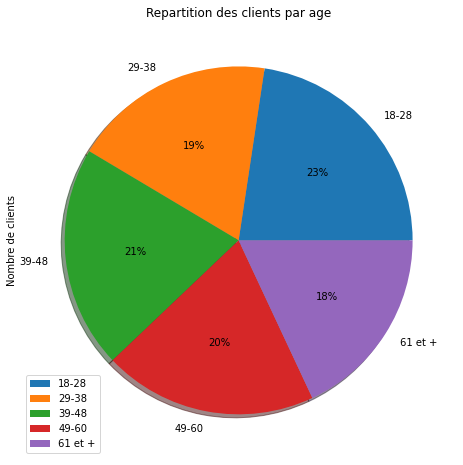

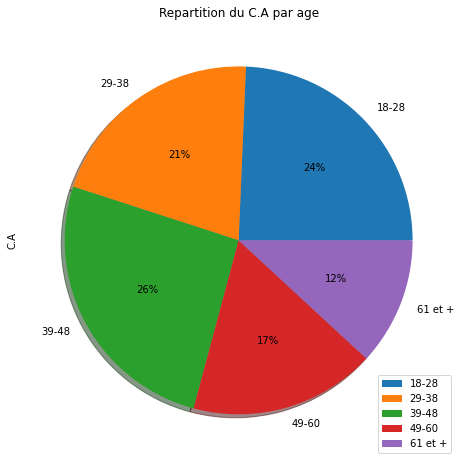

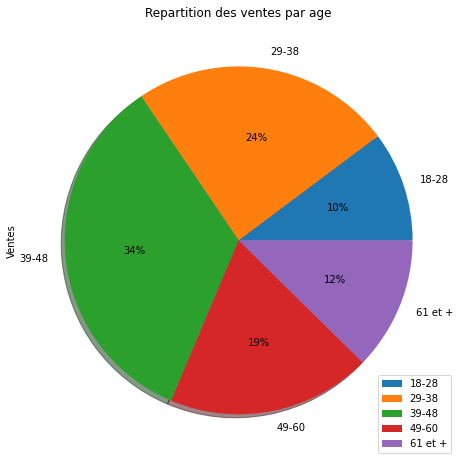

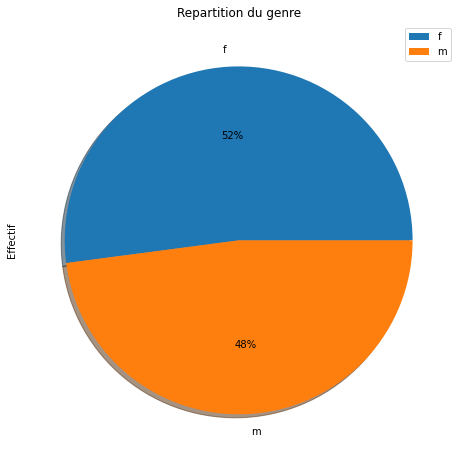

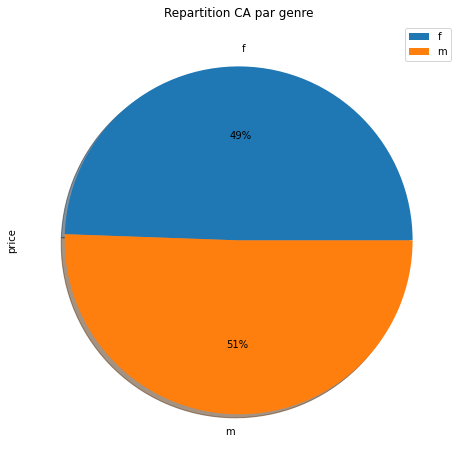

In [25]:
#Joindre la table client au reste
TransactionetProduits = TransactionetProduits.reset_index()
TRANSACTIONS_PRODUIT_CLIENTS = pd.merge(TransactionetProduits, Clients, on='client_id', how ='left')

#Repartition des clients par tranches d'age
#Rajout d'une colonne d'age
today = date.today()
TRANSACTIONS_PRODUIT_CLIENTS['age'] = today.year - TRANSACTIONS_PRODUIT_CLIENTS['birth']
# Créer des tranches d'age
TRANSACTIONS_PRODUIT_CLIENTS.loc[TRANSACTIONS_PRODUIT_CLIENTS['age']<=28, "Tranche d'age"] = '18-28'
TRANSACTIONS_PRODUIT_CLIENTS.loc[TRANSACTIONS_PRODUIT_CLIENTS['age'].between(29,38), "Tranche d'age"] = '29-38'
TRANSACTIONS_PRODUIT_CLIENTS.loc[TRANSACTIONS_PRODUIT_CLIENTS['age'].between(39,48), "Tranche d'age"] = '39-48'
TRANSACTIONS_PRODUIT_CLIENTS.loc[TRANSACTIONS_PRODUIT_CLIENTS['age'].between(49,60), "Tranche d'age"] = '49-60'
TRANSACTIONS_PRODUIT_CLIENTS.loc[TRANSACTIONS_PRODUIT_CLIENTS['age']>=61, "Tranche d'age"] = '61 et +'

# Nombre de client par tranche d'age
NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE = TRANSACTIONS_PRODUIT_CLIENTS[["client_id","Tranche d'age"]]
NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE = NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE.drop_duplicates(subset='client_id', keep='first')
NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE = NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE.groupby("Tranche d'age").count()
NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE = NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE.rename(columns={"client_id": 'Nombre de clients'})

#Calcul du sex par tranche d'age
SEX_PAR_TRANCHE_DAGE = TRANSACTIONS_PRODUIT_CLIENTS[['sex',"Tranche d'age",'client_id']]
SEX_PAR_TRANCHE_DAGE = SEX_PAR_TRANCHE_DAGE.drop_duplicates(subset='client_id', keep='first')
SEX_PAR_TRANCHE_DAGE = SEX_PAR_TRANCHE_DAGE.groupby(["Tranche d'age",'sex'])['client_id'].count()
SEX_PAR_TRANCHE_DAGE = SEX_PAR_TRANCHE_DAGE.to_frame()
SEX_PAR_TRANCHE_DAGE = SEX_PAR_TRANCHE_DAGE.rename(columns={"client_id": 'Effectif'})

# Calcul des ventes par tranches d'age
VENTE_PAR_TRANCHE_DAGE = TRANSACTIONS_PRODUIT_CLIENTS[["date","Tranche d'age"]]
VENTE_PAR_TRANCHE_DAGE = VENTE_PAR_TRANCHE_DAGE.groupby("Tranche d'age").count()
VENTE_PAR_TRANCHE_DAGE = VENTE_PAR_TRANCHE_DAGE.rename(columns={"date": 'Ventes'})


# Calcul du CA par tranche d'age
CA_PAR_TRANCHE_DAGE = TRANSACTIONS_PRODUIT_CLIENTS[["Tranche d'age","price"]]
CA_PAR_TRANCHE_DAGE = CA_PAR_TRANCHE_DAGE.groupby("Tranche d'age").sum()
CA_PAR_TRANCHE_DAGE = CA_PAR_TRANCHE_DAGE.rename(columns={"price": 'C.A'})

#Repartition des clients par sex, nombre de personne et %age
SEX_REPARTITION_GLOBAL = SEX_PAR_TRANCHE_DAGE.groupby('sex')['Effectif'].sum()
SEX_REPARTITION_GLOBAL = SEX_REPARTITION_GLOBAL.to_frame()

#C.A par sex
CA_PAR_SEX = TRANSACTIONS_PRODUIT_CLIENTS[["sex","price"]]
CA_PAR_SEX = CA_PAR_SEX.groupby('sex').sum()

# ca par sex par catégorie
CA_PAR_SEX_PAR_CATEGORIE = TRANSACTIONS_PRODUIT_CLIENTS[["sex","categ","price"]]
CA_PAR_SEX_PAR_CATEGORIE = CA_PAR_SEX_PAR_CATEGORIE.groupby(["categ",'sex'])['price'].sum()
CA_PAR_SEX_PAR_CATEGORIE = CA_PAR_SEX_PAR_CATEGORIE.to_frame()

# vente par sex par catégorie
VENTE_PAR_SEX_PAR_CATEGORIE = TRANSACTIONS_PRODUIT_CLIENTS[["sex","categ","price"]]
VENTE_PAR_SEX_PAR_CATEGORIE = VENTE_PAR_SEX_PAR_CATEGORIE.groupby(["categ",'sex'])['price'].count()
VENTE_PAR_SEX_PAR_CATEGORIE = VENTE_PAR_SEX_PAR_CATEGORIE.to_frame()


# Jointure des tableaux
VENTE_CA_TRANCHE_DAGE = pd.merge(VENTE_PAR_TRANCHE_DAGE, CA_PAR_TRANCHE_DAGE, on="Tranche d'age", how ='outer')
VENTE_CA_TRANCHE_DAGE = pd.merge(VENTE_CA_TRANCHE_DAGE, NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE, on="Tranche d'age", how ='outer')


# Affichage des tables
dfs10 = {'Effectifs des genres' : SEX_REPARTITION_GLOBAL, 'Effectifs des genres par age': SEX_PAR_TRANCHE_DAGE,'Ventes, C.A et effectifs par age': VENTE_CA_TRANCHE_DAGE}
dfs11 = {'C.A par genre': CA_PAR_SEX, 'C.A par catégorie et genre': CA_PAR_SEX_PAR_CATEGORIE, 'Vente par genre et catégories': VENTE_PAR_SEX_PAR_CATEGORIE }
display_dfs(dfs10, justify='flex-start')
display_dfs(dfs11, justify='flex-start')

# graph repartition trache d'age
    # Clients
NOMBRE_DE_CLIENT_PAR_TRANCHE_DAGE.plot(kind='pie',y= 'Nombre de clients',autopct='%1.0f%%', shadow =True, figsize=(8,8), title='Repartition des clients par age')
    # C.A
CA_PAR_TRANCHE_DAGE.plot(kind='pie',y= 'C.A',autopct='%1.0f%%', shadow =True, figsize=(8,8), title='Repartition du C.A par age')
    # Vente
VENTE_PAR_TRANCHE_DAGE.plot(kind='pie',y= 'Ventes',autopct='%1.0f%%', shadow =True, figsize=(8,8), title='Repartition des ventes par age')

# Graph repartition sex
SEX_REPARTITION_GLOBAL.plot(kind='pie',y= 'Effectif',autopct='%1.0f%%', shadow =True, figsize=(8,8), title='Repartition du genre')

# Graph CA par sex
CA_PAR_SEX.plot(kind='pie',y= 'price',autopct='%1.0f%%', shadow =True, figsize=(8,8), title='Repartition CA par genre')


<div style="font-family:Garamond"> <div style="font-size: 20px">
    
**Analyses :**
- Nous avons quasiment la même proportion d'hommes et de femme dans notre clientèle (48 % homme et 52 % femme). Ils se partagent environ en deux le C.A et les ventes de chaque catégorie.

- On a environ la même proportion de client dans chaque tranche d'âge (environ 20 %). Ce qui veut dire que l'âge des clients est varié.

- La tranche d'âge participant le plus au chiffre d'affaires est la tranche 39-48 (26 %) suivie de près par les 18-28 (24 %) et par les 29-38 (21 %). Plus bas, nous avons les 49-60 (17 %) et enfin les 61 et + (12 %).
</div>

### <div style="font-family:Garamond"> <div style="font-size: 20px">Repartition du C.A par client</div>

,C.A
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153662.70
c_3454,113669.82
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


Incide de Gini : 0.4463955148291978


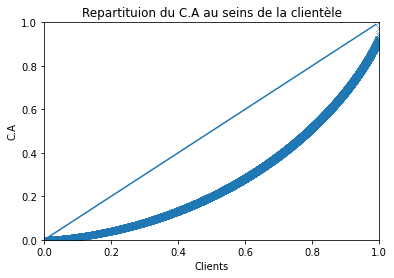

Les 4 leaders représentent à eux seuls 7.431852394094126 du C.A


In [26]:
# Repartition du CA par client
REPARTITION_CA_PAR_CLIENT = TRANSACTIONS_PRODUIT_CLIENTS[['price','client_id']]
REPARTITION_CA_PAR_CLIENT = REPARTITION_CA_PAR_CLIENT.groupby('client_id').sum()
REPARTITION_CA_PAR_CLIENT = REPARTITION_CA_PAR_CLIENT.sort_values('price', ascending=False)
REPARTITION_CA_PAR_CLIENT = REPARTITION_CA_PAR_CLIENT.rename(columns={"price": 'C.A'})

display(REPARTITION_CA_PAR_CLIENT.head(20))

# Courbe de Lorenz définition de la fonction
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
# Indice de Gini, définition de la fonction
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))
    
# Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('Clients')
    plt.ylabel('C.A')
    plt.title(title)
    plt.show()
    
# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(REPARTITION_CA_PAR_CLIENT['C.A'], 'Repartituion du C.A au seins de la clientèle')

# Calculs proportions CA des 4 leaders.
PROPOTION_CA_LEADER = (324033.35+289760.34+153662.70+113669.82)/CA_PAR_SEX['price'].sum()*100
print('Les 4 leaders représentent à eux seuls',PROPOTION_CA_LEADER,'du C.A')


<div style="font-family:Garamond"> <div style="font-size: 20px">
En créant une table avec le C.A. par client, on remarque que 4 clients ( c_1609, c_4958, c_6714, c_3454) se partagent une partie très importante du chiffre d'affaire global ( 7.43%). On peut imaginer que ce sont des professionnelles effectuant d'importantes commandes comme des bibliothèques, des écoles, etc.

La courbe de Lorenz ainsi que l'indice de Gini (0.44) nous indiquent que la répartition du C.A par client est plutôt inégale. On voit qu'environ 70 % des clients génèrent seulement 40 % du C.A
</div>

***

# <span style='font-family:Garamond'><span style='color:#B21807'> 3 Analyse des correlations</span> <a class="anchor" id="chapter3"></a>

## <span style='font-family:Garamond'><span style='color:#046307'> 3.1 Genre d'un client et categorie de livre acheté </span> <a class="anchor" id="section_3_1"></a>

<div style="font-family:Garamond"> <div style="font-size: 20px">

Question : Existe t'il un lien entre le genre d'un client et le catégorie de livre acheté ?

Hypothèse H0 : Il n'y a pas de relation entre ces deux variables.
<br>Hypothèse H1 : Il existe une relation entre l'age et le montant total des achats. 

Population = Ensembles des transactions de la table transaction. 
<br>Individus = Transactions. 
<br>Variables Sex du client ("sex") = Variable qualitative nominale. 
<br>Variable catégorie du livre acheté ("categ") = Variables qualitative ordinale.

La variable categorie contiens plus de deux groupe (categorie 0,1 et 2) on va donc partir sur un test de KHI-2.    
</div>

ventes               
categ     0.0     1.0    2.0
sex                         
f      206220  114899  17283
m      209460  112270  19200

Le resultat du test de khi-deux est de 147.00253568681114

Le degrès de libérté est de  2

Les effectifs attendus sont [[207066.56444861 113161.81769444  18173.61785695]
 [208613.43555139 114007.18230556  18309.38214305]]

La p-valeur est de 1.1989607410166063e-32


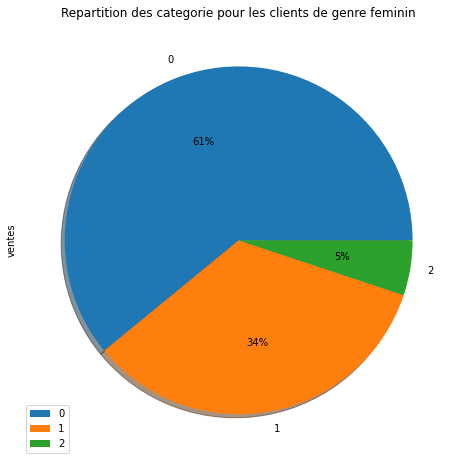

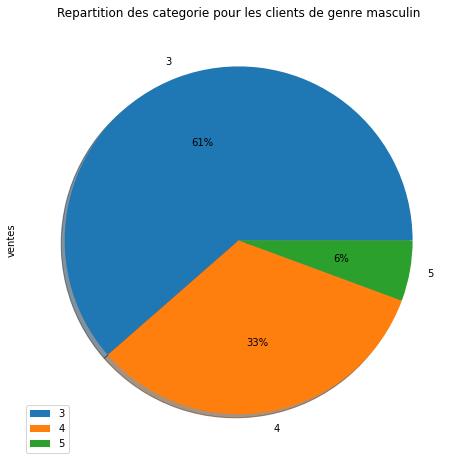

In [27]:
GENRE_ET_CATEGORIES = TRANSACTIONS_PRODUIT_CLIENTS[['date','price','categ','sex']]
GENRE_ET_CATEGORIES = GENRE_ET_CATEGORIES.groupby(["sex",'categ'])['date'].count()
GENRE_ET_CATEGORIES = GENRE_ET_CATEGORIES.to_frame()
GENRE_ET_CATEGORIES = GENRE_ET_CATEGORIES.rename(columns={"date": 'ventes'})
GENRE_ET_CATEGORIES = GENRE_ET_CATEGORIES.reset_index()

FEMMES_ET_CATEGORIES = GENRE_ET_CATEGORIES.loc[GENRE_ET_CATEGORIES['sex'] == 'f']
HOMMES_ET_CATEGORIES = GENRE_ET_CATEGORIES.loc[GENRE_ET_CATEGORIES['sex'] == 'm']

#Femme et catégorie
FEMMES_ET_CATEGORIES.plot(kind='pie',y= 'ventes',autopct='%1.0f%%', shadow =True, figsize=(8,8), title='Repartition des categorie pour les clients de genre feminin')

#Homme et catégorie
HOMMES_ET_CATEGORIES.plot(kind='pie',y= 'ventes',autopct='%1.0f%%', shadow =True, figsize=(8,8), title='Repartition des categorie pour les clients de genre masculin')

# Création d'un tableau de contingence
GENRE_ET_CATEGORIES_CONTINGENCE = GENRE_ET_CATEGORIES.pivot_table(index='sex', columns='categ')
display(GENRE_ET_CATEGORIES_CONTINGENCE)

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(GENRE_ET_CATEGORIES_CONTINGENCE)
print('Le resultat du test de khi-deux est de', st_chi2 )
print()
print('Le degrès de libérté est de ',st_dof)
print()
print('Les effectifs attendus sont', st_exp.round(10))
print()
print('La p-valeur est de',st_p)

<div style="font-family:Garamond"> <div style="font-size: 20px">
D'après le test de khi-deux effectué, l'hypothèse H 0 ne peut pas être accepté, car le résultat (147) est supérieur au seuil de significativité (5.99) de la table du khi-deux pour un degré de liberté de 2. La p-valeur, étant inférieur à 0.05 %, prouve bien la faible probabilité de faire une erreur de type 1 (rejeter H 0 à tort).

On peut donc dire que la variable genre est corrélé à la variable catégorie de livre.

Cependant, analysant la répartition des catégories de livre acheté pour chaque genre, on voit qu'il y a en réalité peu de différence. On pourrait, afin d'être plus précis, effectuer un test V de Cramer pour mesurer l'intensité de cette corrélation. Pour rappel la formule du V de Cramer est √((Khi2/(echantillon*degrèsdeliberté))= nombre 0 et 1. Plus le v de Cramer s’approche	de 1, plus l’intensité de la relation est forte.
</div>


In [38]:
# Execution du test V de Cramer
print('V de Cramer = ',np.sqrt((147/679332*2)))

V de Cramer =  0.02080331901399866


<div style="font-family:Garamond"> <div style="font-size: 20px">
L'intensité de la corrélation est très faible, même si le test de Khi'2 affirme une relation, on sait maintenant qu'elle est non significative.

</div>

## <span style='font-family:Garamond'><span style='color:#046307'> 3.2 Age et montant total des achats</span> <a class="anchor" id="section_3_2"></a>

<div style="font-family:Garamond"> <div style="font-size: 20px">

Question :Existe t'il un lien entre l'age d'un client et le montant total de ses achats dans la librairie ?

Hypothèse H0 : Il n'y a pas de relation entre ces deux variables.
<br>Hypothèse H1 : Il existe une relation entre l'age et le montant total des achats. 

Population = Ensembles des clients ayant fait des achats. 
<br>Individus = clients. 
    
2 Variables à analyser :
<br>Variables Age = Variable quantitative discrète. 
<br>Variable Montant total des achats = Variables quantitative continue.

On cherche donc à chercher un lien entre deux variables quantitatives ( deux montants) ce sera donc un test d'association.

Les deux variables informent sur le même echantillon, ce sont donc des echantillons appariés.
</div>


,W,pval,normal
age,0.954923,0.008753,False


,W,pval,normal
montant total des ventes,0.887969,0.000006,False


,n,r,CI95%,p-val,power
spearman,76,-0.857608,"[-0.91, -0.78]",4.579729e-23,1.0


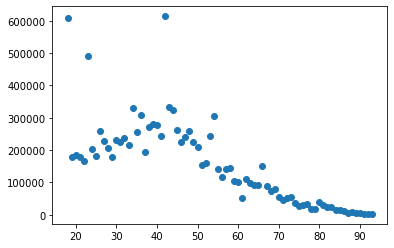

In [95]:
# Test normalité variables age et montant des achats
AGE_MONTANT_TOTAL = TRANSACTIONS_PRODUIT_CLIENTS[['client_id','price','age']]
AGE_MONTANT_TOTAL = AGE_MONTANT_TOTAL.groupby('client_id').agg({'price':'sum', 'age': 'mean'})
AGE_MONTANT_TOTAL = AGE_MONTANT_TOTAL.rename(columns={"price": 'montant total des ventes'})
AGE_MONTANT_TOTAL = AGE_MONTANT_TOTAL.groupby('age')['montant total des ventes'].sum().to_frame().reset_index()

# Test de shapiro wilk
display(pg.normality(AGE_MONTANT_TOTAL["age"]))
display(pg.normality(AGE_MONTANT_TOTAL['montant total des ventes']))

# Visualisation du montant du panier par age
plt.scatter(AGE_MONTANT_TOTAL['age'], AGE_MONTANT_TOTAL['montant total des ventes'] )


# Test de spearman
display(pg.corr(AGE_MONTANT_TOTAL["age"],AGE_MONTANT_TOTAL['montant total des ventes'], alternative='two-sided', method='spearman'))

<div style="font-family:Garamond"> <div style="font-size: 20px">
Grace au test de shapiro wilk, on voit que les variables  ne suivent pas une distribution normale, ce qui va nous obliger à utiliser un test non paramétrique celui de spearman.

Le résultat du test de spearman nous indique une forte corrélation inverse (-0.86). Ce qui veut dire que plus un client est âgé, moins il dépense. La p-value est inférieur à 0.5, on a donc de forte chance que cette corrélation soit vraie. 
</div>
    

##  <span style='font-family:Garamond'><span style='color:#046307'> 3.3 Frequence d'achat et age d'un client</span> <a class="anchor" id="section_3_3"></a>

<div style="font-family:Garamond"> <div style="font-size: 20px">

Question : y a-t-il un lien entre la fréquence d'achat et l'age d'un client (plus le client vieillis plus le temps entre les achats augmentent ou diminue).

H0 : absence de lien.
H1 : présence d'une corrélation.

Population : clients de la librairie.
<br>Échantillon : tous les clients de la table transaction (correspondant normalement à l'ensemble des ventes de la période).
<br>Individus : Les clients de la table.

Deux variables :
La variable age : une variable quantitative discrète.
<br>La variable fréquence d'achat : une variable quantitative continue.

Les deux variables sont des caractéristiques du même échantillon, ce sont donc des échantillons dépendant pour chaque variable.

Nous allons opérer un test d'association.

On sait déjà que la variable age ne suit pas une loi normale, on va donc créer la table et passer directement au test (spearman) en ajoutant une colonne fréquence d'achat..
</div>


,age,fréquence d achat
0,18.0,0.025106
1,19.0,0.007499
2,20.0,0.007607
3,21.0,0.007102
4,22.0,0.007072
...,...,...
71,89.0,0.000684
72,90.0,0.000602
73,91.0,0.000280
74,92.0,0.000427


,n,r,CI95%,p-val,power
spearman,76,-0.664197,"[-0.77, -0.52]",6.113686e-11,1.0


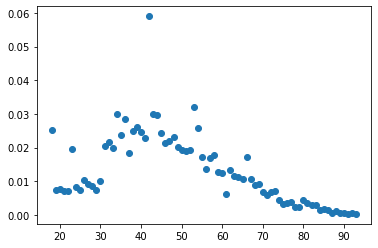

In [94]:
FREQUENCEACHAT_AGE =TRANSACTIONS_PRODUIT_CLIENTS[['client_id','age','session_id']]
#Supression des sessionid en double ( pour compter ensuite le nombre de session unique pour le calcul de la frequence d'achat)
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.drop_duplicates(subset='session_id', keep='first')
# Groupement du nombre de session d'achat par client avec l'age du client
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.groupby('client_id').agg({'session_id' : 'count', 'age' : 'mean'})
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.rename(columns={'session_id': 'Nombre de session d achat effectué'})
# Création de la colonne fréquence d'achat par client
FREQUENCEACHAT_AGE['fréquence d achat'] = FREQUENCEACHAT_AGE['Nombre de session d achat effectué']/342315
# Obtenir la frequence d'achat moyenne par age
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.groupby('age')['fréquence d achat'].sum()
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.to_frame()
FREQUENCEACHAT_AGE = FREQUENCEACHAT_AGE.reset_index()
display(FREQUENCEACHAT_AGE)

#Scatterplot représentant la fréquence d'achat par age
plt.figure()
plt.scatter(FREQUENCEACHAT_AGE['age'], FREQUENCEACHAT_AGE['fréquence d achat'] )

# Test de spearman
display(pg.corr(FREQUENCEACHAT_AGE["age"], FREQUENCEACHAT_AGE["fréquence d achat"], method='spearman'))


<div style="font-family:Garamond"> <div style="font-size: 20px">
Le test nous indique qu'il y a une probabilité plutôt importante (66 %) que les deux variables soient inversement corrélée (plus le client est âgé moins il achète régulièrement.). La p-value est inferieur à 0.05, ce qui assure une bonne validité du test.
    
Le graphique est très similaire à celui du montant total des achats, on retrouve un pic autour de 40 ans et c'est surtout après 45/50 ans que la fréquence descend en même temps que l'âge augmente.

</div>

## <span style='font-family:Garamond'><span style='color:#046307'> 3.4 Age et taille du panier moyen</span> <a class="anchor" id="section_3_4"></a>

<div style="font-family:Garamond"> <div style="font-size: 20px">
 Question Est ce que l'âge influe sur la taille du panier moyen ?

Hypothèse H0 : il n'y a pas de relation entre ces deux variables.
<br>Hypothèse H1 : il existe une relation entre l'âge et la taille du panier moyen.

Population = Clients
<br>L'échantillon est l'ensemble des clients enregistrés sur la table transaction.

2 Variables à analyser :
<br>Variables 1, Age = Variable quantitative discrète.
<br>Variable 2, Taille du panier moyens = Variables quantitative continue.

On cherche donc à chercher un lien entre deux variables quantitatives (deux montants) ce sera donc un test d'association.

Les deux variables informent sur le même échantillon, ce sont donc des échantillons appariés.

On sait déjà que l'age ne répond pas à une loi normale, on va donc utiliser à nouveau un test non-paramétrique (Spearman encore).
</div>


,age,taille panier moyen
0,18.0,1.762741
1,19.0,1.702766
2,20.0,1.761521
3,21.0,1.749074
4,22.0,1.823627
...,...,...
71,89.0,1.397436
72,90.0,1.509709
73,91.0,1.770833
74,92.0,1.547945


,n,r,CI95%,p-val,power
spearman,76,-0.612413,"[-0.74, -0.45]",4.130848e-09,0.999984


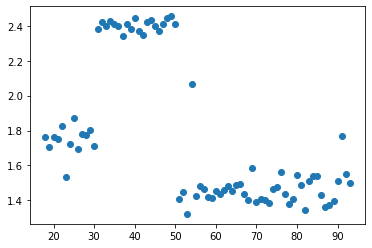

In [100]:
#Première agrégation selon l'age client et les sessions en comptage de modalités
AGE_PANIER_MOYEN = TRANSACTIONS_PRODUIT_CLIENTS.groupby(['age', 'session_id']).count().reset_index()
AGE_PANIER_MOYEN = AGE_PANIER_MOYEN.groupby('age').mean().reset_index()
AGE_PANIER_MOYEN = AGE_PANIER_MOYEN[['age', 'id_prod']]
AGE_PANIER_MOYEN = AGE_PANIER_MOYEN.rename(columns={"id_prod": 'taille panier moyen'})
display(AGE_PANIER_MOYEN)

# Visualisation de la taille du panier moyen en fonction de l'age
plt.figure()
plt.scatter(AGE_PANIER_MOYEN['age'], AGE_PANIER_MOYEN['taille panier moyen'] )

#Coefficient de corrélation linéaire de spearman.
display(pg.corr(AGE_PANIER_MOYEN["age"], AGE_PANIER_MOYEN['taille panier moyen'], method='spearman'))


<div style="font-family:Garamond"> <div style="font-size: 20px">
Le test nous indique, comme pour les deux derniers résultats, une corrélation indirecte, c'est-à-dire que plus le client est âgé, moins la taille de son panier est important. L'écart de confiance est un peu plus important que pour les deux autres tests (descends jusqu'à -0.45) mais la p-value est en dessous de 0,05 ce qui assure une pertinence du test. On peut dire que c'est une corrélation moyenne.  
<br> Sur le graphique, on peut clairement observer une rupture importante autour de 50 ans entre les plus jeunes et les plus âgés.
</div>

## <span style='font-family:Garamond'><span style='color:#046307'> 3.5 Age et categorie de livre acheté </span> <a class="anchor" id="section_3_5"></a>


<div style="font-family:Garamond"> <div style="font-size: 20px">
    
**Question** : Est ce que l'age influ sur la categorie de livre acheté ? 
    
Ho = Asbence de correlation entre les deux.
<br>H1 = Présence d'une correlation entre les deux.

**Echantillon** : Les achats unitairesenregistrées, dans la table transaction.
<br> **Individus** : Les achats unitaires.

**Variable 1**, Age : Qualitative ordinale car nous allons faire des tranches d'age.
<br>**Variable 2**, Qualitatve Ordinale.

**Echantillons indépendant ou appariés** : L'étude de ses deux variables concerne le même échantillon : des achats unitaires ayant une variable répertoriant la catégorie à laquelle le produit appartient et une autre variable donnant l'âge de son acheteur. Ce sont deux echantillons appariés.

**Choix du test** Afin de vérifier la corrélation entre deux qualitatives dont une ordinale, on peut utiliser un test ETA². Pour cela on va devoir créer des tranches d'ages et obtenir le nombre de vente dans chaque catégorie par tranche d'age.    
</div>

resultat coeff ETA² = 0.35


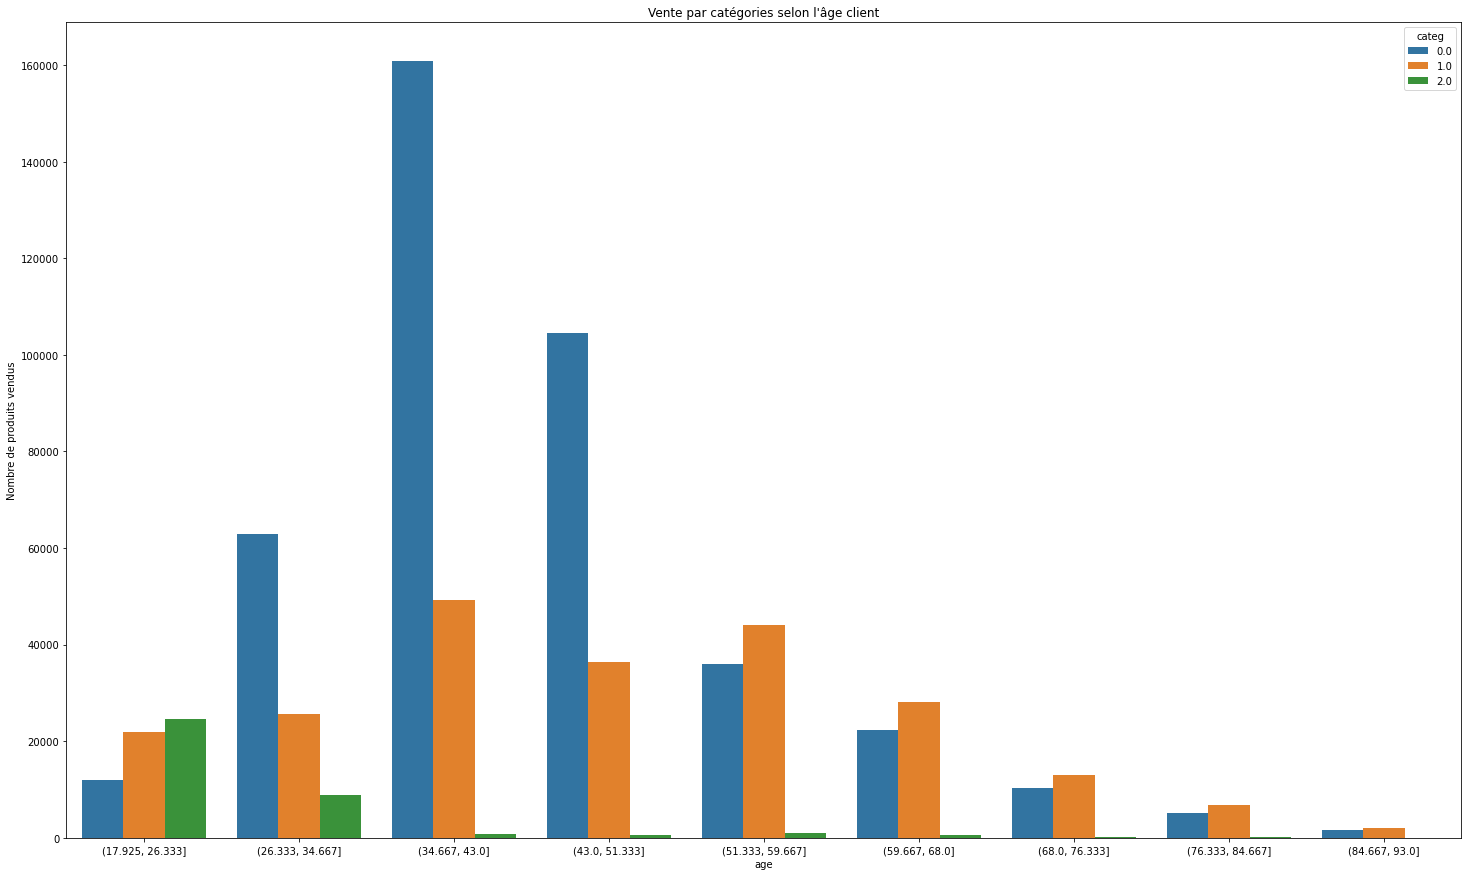

In [108]:
# Creation d'une table avec l'age,la categorie et le session_id
AGE_CATEGORIE = TRANSACTIONS_PRODUIT_CLIENTS[['age','categ','session_id']]
# Compter nombre de vente par categorie et par age
AGE_CATEGORIE = AGE_CATEGORIE.groupby(['age', 'categ']).count().reset_index()
AGE_CATEGORIE = AGE_CATEGORIE[['age', 'categ', 'session_id']]

#créer  9 groupes d'âges, une segmentation des individus 'age'
AGE_CATEGORIE['age']= pd.cut(AGE_CATEGORIE['age'], 9)
AGE_CATEGORIE = AGE_CATEGORIE.groupby(['age','categ']).sum().reset_index()
AGE_CATEGORIE

# Visualisation vente par categorie par tranche d'age
fig, ax = plt.subplots(figsize=(25, 15))
sns.barplot(x="age", y="session_id",hue="categ", data=AGE_CATEGORIE)

#Coefficient Eta-2
X = "categ"
Y = "age" 

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

print('resultat coeff ETA² =', round(eta_squared(AGE_CATEGORIE.age, AGE_CATEGORIE.session_id), 2))

# visualisation
ax.set_xlabel('age')
ax.set_ylabel('Nombre de produits vendus')
ax.set_title('Vente par catégories selon l\'âge client')
plt.show()


<div style="font-family:Garamond"> <div style="font-size: 20px">
Le coefficiant ETA² s'interprettant comme un coefficiant de spearman, on peut donc dire dans ce cas qu'il y a une faible correlation entre l'age et la categorie de livre acheté (0,35).  
</div>

***

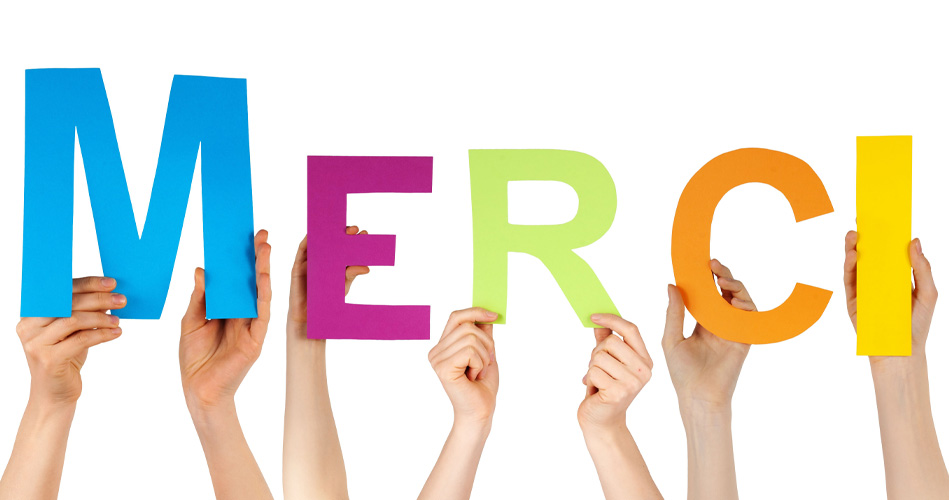